# Classical Simulation

Many quantum information subroutines are reversible classical operations. The catch is that they are operated on superpositions of classical bitstrings. However, we can unit test these operations by checking against specific bitstrings through the `call_classically` bloqs protocol.

In [1]:
from typing import *

import numpy as np
from attrs import frozen
from numpy.typing import NDArray

from qualtran import Bloq, BloqBuilder, Register, Signature, Side
from qualtran.drawing import show_bloq

## CNOT

The simplest classical gate is the controlled not. This flips the target bit if `ctrl` is set. We can implement the `on_classical_vals` method to encode this behavior.

In [2]:
@frozen
class CNOTExample(Bloq):
    @property
    def signature(self) -> 'Signature':
        return Signature.build(ctrl=1, target=1)

    def on_classical_vals(
        self, ctrl: NDArray[np.uint8], target: NDArray[np.uint8]
    ) -> Dict[str, NDArray[np.uint8]]:
        target_out = (ctrl + target) % 2
        return {'ctrl': ctrl, 'target': target_out}

We can call the Bloq on classical inputs by using `Bloq.call_classically()`. 

In [3]:
CNOTExample().call_classically(ctrl=1, target=0)

(1, 1)

In [4]:
import itertools
for c, t in itertools.product([0,1], repeat=2):
    out_c, out_t = CNOTExample().call_classically(ctrl=c, target=t)
    print(f'{c}{t} -> {out_c}{out_t}')

00 -> 00
01 -> 01
10 -> 11
11 -> 10


### Drawing

We can draw the flow of classical values as well using `ClassicalSimGraphDrawer`

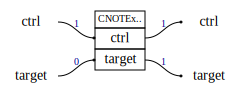

In [5]:
from qualtran.drawing import ClassicalSimGraphDrawer

drawer = ClassicalSimGraphDrawer(CNOTExample(), vals=dict(ctrl=1, target=0))
drawer.get_svg()

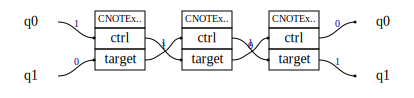

In [6]:
# Build a SWAP circuit
bb = BloqBuilder()
q0 = bb.add_register('q0', 1)
q1 = bb.add_register('q1', 1)
q0, q1 = bb.add(CNOTExample(), ctrl=q0, target=q1)
q1, q0 = bb.add(CNOTExample(), ctrl=q1, target=q0)
q0, q1 = bb.add(CNOTExample(), ctrl=q0, target=q1)
cbloq = bb.finalize(q0=q0, q1=q1)

drawer = ClassicalSimGraphDrawer(cbloq, vals=dict(q0=1, q1=0))
drawer.get_svg()